In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

if os.getcwd()[-7:] == 'AAM_Sim':
    print(os.getcwd())
else:
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    path_parent = os.path.dirname(os.getcwd())
    os.chdir(path_parent)
    print(os.getcwd())

from CrossPlatformDev import my_print, join_str

import time

C:\Users\quekz\PycharmProjects\AAM_Sim


In [2]:
from MonteCarlo.TwoAircraftEncounter.ScenarioMP_Sensitivity_Analysis import simulate_encounter_debug


run = 0

start = time.time()
AC1_GT_Trajectory, AC2_GT_Trajectory, AC1_Trk_Trajectory, AC2_Trk_Trajectory, AC1_WPTs, AC2_WPTs = simulate_encounter_debug(run)


end = time.time()
compute_time = end-start
simulated_time = AC1_GT_Trajectory.iloc[-1]['time'] + AC2_GT_Trajectory.iloc[-1]['time']
speedup = simulated_time/compute_time

print('Simulation took: %.3f sec, simulated flight time: %.3f sec, total speedup: %.3f times'
      %(compute_time, simulated_time, speedup))

CHANGE FLIGHT LEG
Next Wpt is:  [-354.41991329  -68.84827602    0.        ]
Hdg is:  [266.9599044   51.85862446   0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-24.65287399  48.07643889   0.        ]
Hdg is:  [  85.84825147 -167.41570241    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [  61.19537748 -119.33926351    0.        ]
Hdg is:  [  85.84825147 -167.41570241    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [-87.46000889 -16.98965156   0.        ]
Hdg is:  [266.9599044   51.85862446   0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [179.49989551  34.8689729    0.        ]
Hdg is:  [266.9599044   51.85862446   0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [ 147.04362895 -286.75496592    0.        ]
Hdg is:  [  85.84825147 -167.41570241    0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [446.45979991  86.72759736   0.        ]
Hdg is:  [266.9599044   51.85862446   0.        ]
CHANGE FLIGHT LEG
Next Wpt is:  [ 232.89188042 -454.17066833    0.        ]
Hdg is:  [  85.84825147 -167.41570241    0.  

In [3]:
def special_concat(trajectory):
    return np.concatenate(trajectory).reshape(len(trajectory), 8) # 8 is the length of each mini array

def extract_from_df(df, key, idx):
    """Extracts single column from df cells with 3D point values. """
    df_len = len(df)
    return np.concatenate(df[key].to_numpy()).reshape(df_len, 3)[:,idx]

Text(0.5, 1.0, 'ACCEL TRACE - Z')

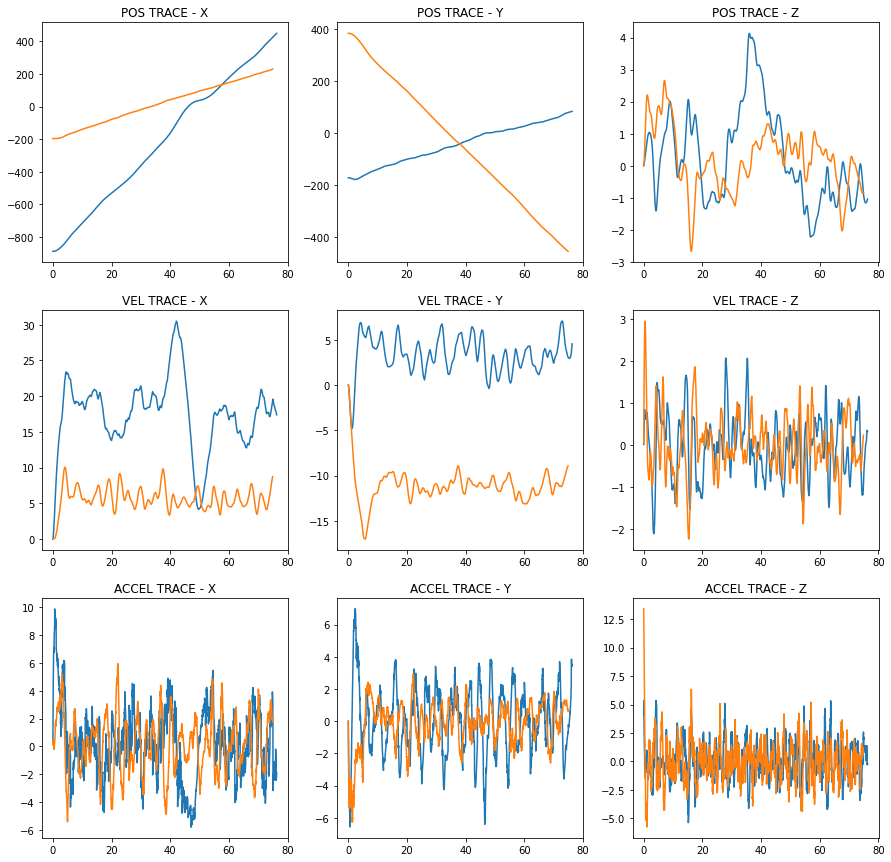

In [4]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

axs[0,0].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_pos', 0), label='AC1')
axs[0,0].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_pos', 0), label='AC2')
axs[0,0].set_title('POS TRACE - X')

axs[0,1].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_pos', 1), label='AC1')
axs[0,1].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_pos', 1), label='AC2')
axs[0,1].set_title('POS TRACE - Y')

axs[0,2].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_pos', 2), label='AC1')
axs[0,2].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_pos', 2), label='AC2')
axs[0,2].set_title('POS TRACE - Z')

axs[1,0].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_vel', 0), label='AC1')
axs[1,0].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_vel', 0), label='AC2')
axs[1,0].set_title('VEL TRACE - X')

axs[1,1].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_vel', 1), label='AC1')
axs[1,1].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_vel', 1), label='AC2')
axs[1,1].set_title('VEL TRACE - Y')

axs[1,2].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'gt_vel', 2), label='AC1')
axs[1,2].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'gt_vel', 2), label='AC2')
axs[1,2].set_title('VEL TRACE - Z')

axs[2,0].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'accel', 0), label='AC1')
axs[2,0].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'accel', 0), label='AC2')
axs[2,0].set_title('ACCEL TRACE - X')

axs[2,1].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'accel', 1), label='AC1')
axs[2,1].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'accel', 1), label='AC2')
axs[2,1].set_title('ACCEL TRACE - Y')

axs[2,2].plot(AC1_GT_Trajectory['time'], extract_from_df(AC1_GT_Trajectory, 'accel', 2), label='AC1')
axs[2,2].plot(AC2_GT_Trajectory['time'], extract_from_df(AC2_GT_Trajectory, 'accel', 2), label='AC2')
axs[2,2].set_title('ACCEL TRACE - Z')

<IPython.core.display.Javascript object>


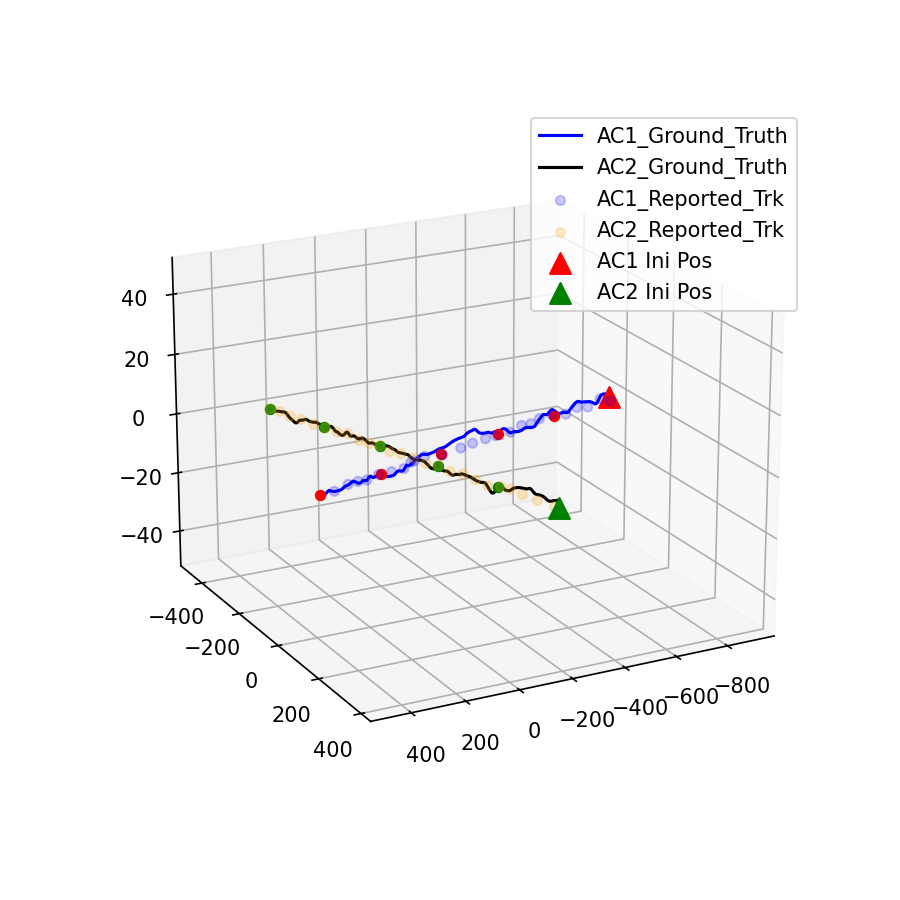

[-621.37981769 -120.70690048    0.        ]
[-354.41991329  -68.84827602    0.        ]
[-87.46000889 -16.98965156   0.        ]
[179.49989551  34.8689729    0.        ]
[446.45979991  86.72759736   0.        ]
[-110.50112546  215.4921413     0.        ]
[-24.65287399  48.07643889   0.        ]
[  61.19537748 -119.33926351    0.        ]
[ 147.04362895 -286.75496592    0.        ]
[ 232.89188042 -454.17066833    0.        ]


In [5]:
%matplotlib notebook

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')

ax.plot(extract_from_df(AC1_GT_Trajectory, 'gt_pos', 0), 
           extract_from_df(AC1_GT_Trajectory, 'gt_pos', 1), 
           extract_from_df(AC1_GT_Trajectory, 'gt_pos', 2), c='b', label='AC1_Ground_Truth')

ax.plot(extract_from_df(AC2_GT_Trajectory, 'gt_pos', 0), 
           extract_from_df(AC2_GT_Trajectory, 'gt_pos', 1), 
           extract_from_df(AC2_GT_Trajectory, 'gt_pos', 2), c='black', label='AC2_Ground_Truth')

ax.scatter(AC1_Trk_Trajectory[:,2], 
           AC1_Trk_Trajectory[:,3],
           AC1_Trk_Trajectory[:,4], c='b', alpha=0.2, label='AC1_Reported_Trk')

ax.scatter(AC2_Trk_Trajectory[:,2], 
           AC2_Trk_Trajectory[:,3],
           AC2_Trk_Trajectory[:,4], c='orange', alpha=0.2, label='AC2_Reported_Trk')

for wpt in AC1_WPTs[1:]:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='r')
    print(wpt)

xx, yy, zz = AC1_WPTs[0]
ax.scatter(xx, yy, zz, c='r', marker='^', s=100, label='AC1 Ini Pos')
    
for wpt in AC2_WPTs[1:]:
    xx, yy, zz = wpt
    ax.scatter(xx, yy, zz, c='g')
    print(wpt)

xx, yy, zz = AC2_WPTs[0]
ax.scatter(xx, yy, zz, c='g', marker='^', s=100, label='AC2 Ini Pos')

    
# ax.set_xlim(-10, 510)
# ax.set_ylim(-100, 100)
ax.set_zlim(-50,50)
ax.legend()

plt.show()